In [1]:
import random, cv2, os
import matplotlib.pyplot as plt
import torch, detectron2
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultTrainer
from detectron2.data.catalog import Metadata
from detectron2.config import get_cfg
from detectron2.data.datasets import register_coco_instances
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode
from detectron2.engine import DefaultPredictor

/home/lt/.pyenv/versions/3.7.13/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
register_coco_instances("carbonaro_coco_segmentation_train", {}, "./carbonaro_coco_segmentation/train/_annotations.coco.json", "./carbonaro_coco_segmentation/train/")
register_coco_instances("carbonaro_coco_segmentation_valid", {}, "./carbonaro_coco_segmentation/valid/_annotations.coco.json", "./carbonaro_coco_segmentation/valid/")

./carbonaro_coco_segmentation/train/img_2022-05-31t19_09_32-417992_jpg.rf.8b0a4b2de8e572ceb9f705f501ea3f5c.jpg


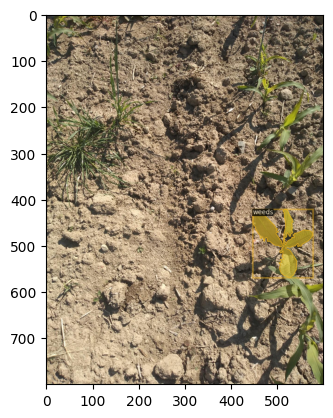

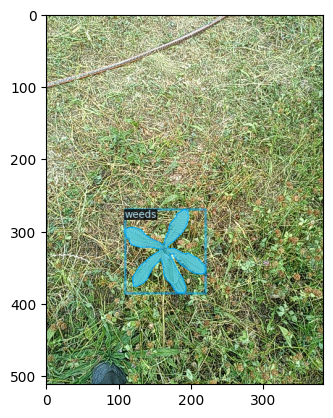

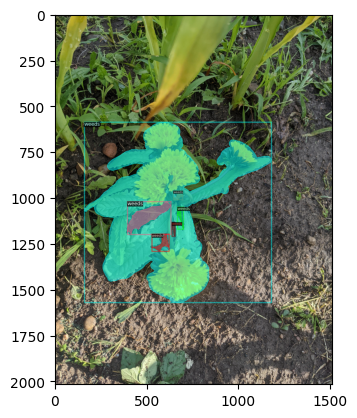

In [3]:
# metadata = MetadataCatalog.get("carbonaro_coco_segmentation_train")
metadata = Metadata().set(
            thing_classes=[
                "object",
                "weeds",
                "cans",
            ],
        )
dataset_dicts = DatasetCatalog.get("carbonaro_coco_segmentation_train")
print(dataset_dicts[0]["file_name"])

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    image = vis.get_image()
    plt.imshow(image)
    plt.show()

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("carbonaro_coco_segmentation_train",)
cfg.DATASETS.TEST = ("carbonaro_coco_segmentation_valid",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4  # This is the real "batch size" commonly known to deep learning people
#cfg.SOLVER.BASE_LR = 0.02  # pick a good LR
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = [] # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512   # The "RoIHead batch size" default: 512
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3 #(see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

In [5]:

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[01/15 16:02:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

2023-01-15 16:02:07.636312: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-15 16:02:08.350723: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lt/.pyenv/versions/3.7.13/lib/python3.7/site-packages/cv2/../../lib64:
2023-01-15 16:02:08.350785: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lt/.pyenv/versions/3.7.13/lib/python3.7/site-pa

[01/15 16:02:09 d2.engine.train_loop]: Starting training from iteration 0


/home/lt/.pyenv/versions/3.7.13/lib/python3.7/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/lt/.pyenv/versions/3.7.13/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[01/15 16:02:16 d2.utils.events]:  eta: 0:04:58  iter: 19  total_loss: 1.823  loss_cls: 0.6971  loss_box_reg: 0.08613  loss_mask: 0.68  loss_rpn_cls: 0.06944  loss_rpn_loc: 0.009699  time: 0.3138  data_time: 0.0456  lr: 0.00039962  max_mem: 4140M
[01/15 16:02:22 d2.utils.events]:  eta: 0:04:54  iter: 39  total_loss: 0.8952  loss_cls: 0.1603  loss_box_reg: 0.09788  loss_mask: 0.5664  loss_rpn_cls: 0.0494  loss_rpn_loc: 0.01155  time: 0.3163  data_time: 0.0093  lr: 0.00079922  max_mem: 4140M
[01/15 16:02:28 d2.utils.events]:  eta: 0:04:51  iter: 59  total_loss: 0.7454  loss_cls: 0.1397  loss_box_reg: 0.1342  loss_mask: 0.3968  loss_rpn_cls: 0.04054  loss_rpn_loc: 0.008961  time: 0.3154  data_time: 0.0125  lr: 0.0011988  max_mem: 4140M
[01/15 16:02:35 d2.utils.events]:  eta: 0:04:42  iter: 79  total_loss: 0.5575  loss_cls: 0.09884  loss_box_reg: 0.1159  loss_mask: 0.3362  loss_rpn_cls: 0.0449  loss_rpn_loc: 0.007935  time: 0.3141  data_time: 0.0174  lr: 0.0015984  max_mem: 4140M
[01/15 16

In [21]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "v1_detectron2.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

In [22]:
print(cfg.dump())  # print formatted configs
with open("config.yaml", "w") as f:
  f.write(cfg.dump())   # save config to file

CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - carbonaro_coco_segmentation_valid
  TRAIN: carbonaro_coco_segmentation_train
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
  